# **Pneumonia Detectection Using VGG19 and Comparision with Other Models**

In [1]:
# Importing Dependencies

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import cv2
from tensorflow.keras.utils import img_to_array
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
# Mounting Google Drive to the Colab notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Pre-Processing**

In [3]:
# ImageDataGenerator object to generate augmented images from the training data 

train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

In [4]:
train_images = "/content/drive/MyDrive/chest_xray/train"

In [ ]:
train_generator = train_datagen.flow_from_directory(train_images,
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
x_train_batch, y_train_batch = next(train_generator)

# Printing the shape of the training data
print('Training data shape:', x_train_batch.shape)

# Printing the shape of the training labels
print('Training labels shape:', y_train_batch.shape)

Training data shape: (128, 300, 300, 3)
Training labels shape: (128,)


In [ ]:
# ImageDataGenerator object to generate augmented images from the validation data 

validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/val',
    target_size= (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 16 images belonging to 2 classes.


In [ ]:
# ImageDataGenerator object to generate augmented images from the test data 

test_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/chest_xray/test',
    target_size = (300, 300),
    batch_size = 128, 
    class_mode = 'binary'
)

Found 624 images belonging to 2 classes.


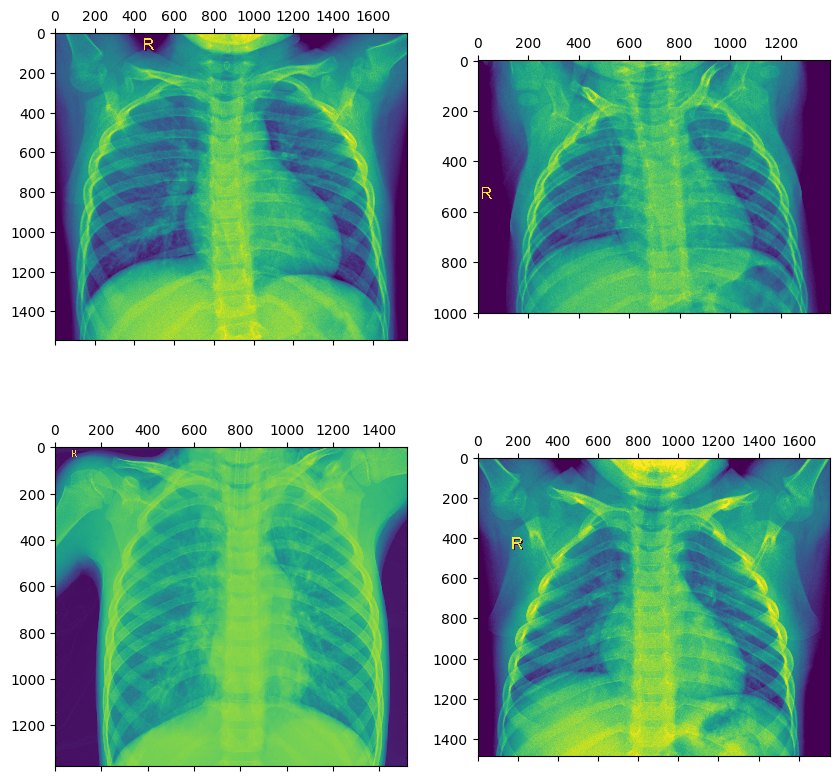

In [ ]:
# Displaying some Pneumonia Class Images from the Train Dataset

plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(2,2,1)
plot2 = plot_image.add_subplot(2,2,2)
plot3 = plot_image.add_subplot(2,2,3)
plot4 = plot_image.add_subplot(2,2,4)

plot1.matshow(plt.imread(train_generator.filepaths[41]))
plot2.matshow(plt.imread(train_generator.filepaths[176]))
plot3.matshow(plt.imread(train_generator.filepaths[1553]))
plot4.matshow(plt.imread(train_generator.filepaths[354]))

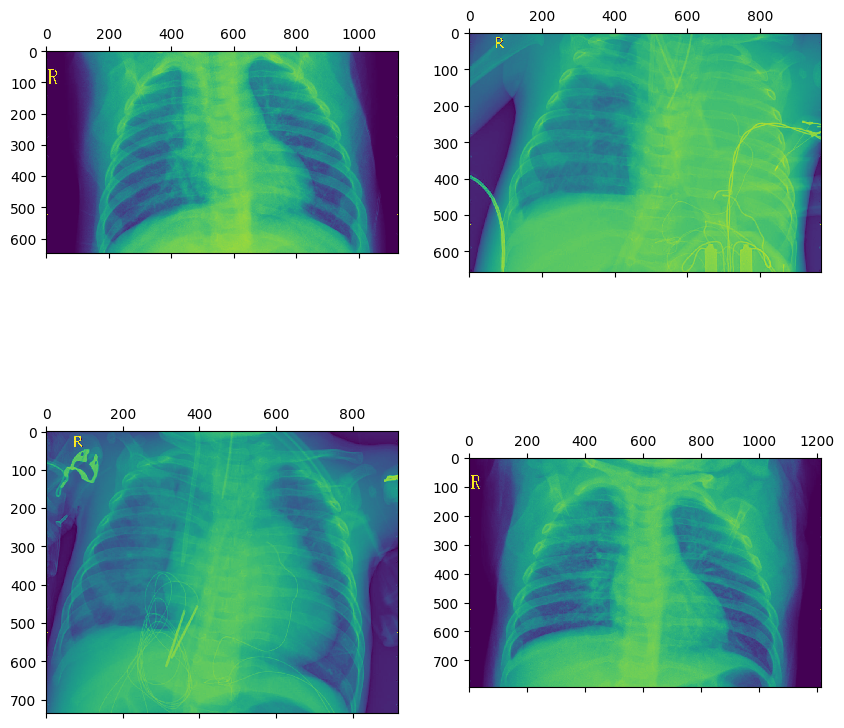

In [ ]:
# Displaying some Normal Class Images from the Train Dataset

plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(2,2,1)
plot2 = plot_image.add_subplot(2,2,2)
plot3 = plot_image.add_subplot(2,2,3)
plot4 = plot_image.add_subplot(2,2,4)

plot1.matshow(plt.imread(train_generator.filepaths[1419]))
plot2.matshow(plt.imread(train_generator.filepaths[1365]))
plot3.matshow(plt.imread(train_generator.filepaths[1400]))
plot4.matshow(plt.imread(train_generator.filepaths[1350]))

In [ ]:
# Initializing Models used and their test accuracies 
models_used = ['VGG19', 'Resnet50', 'InceptionV3']
test_accuracy = []

# **Classification Using VGG19 (Best Model)**

**Model 1 : VGG19**

In [ ]:
# VGG19 Model Construction

from tensorflow.keras.applications.vgg19 import VGG19

model_1 = Sequential()
model_1.add(VGG19(weights="imagenet", include_top=False, input_shape=(300,300, 3)))
model_1.add(Flatten())
model_1.add(Dropout(0.4))

# Adding Custom Dense Layers
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(64, activation="relu"))
model_1.add(Dense(16, activation="relu"))
model_1.add(Dense(1, activation="sigmoid"))

# Setting the last 7 layers of the architecture as frozen and not trainable
model_1.layers[-7].trainable = False


In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 9, 9, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 41472)             0         
                                                                 
 dropout_1 (Dropout)         (None, 41472)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               5308544   
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
model_1.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
history = model_1.fit(train_generator, epochs = 13, validation_data = validation_generator)

Epoch 1/13
41/41 [==============================] - 204s 5s/step - loss: 0.5884 - accuracy: 0.8309 - val_loss: 0.3097 - val_accuracy: 0.7500
Epoch 2/13
41/41 [==============================] - 180s 4s/step - loss: 0.1836 - accuracy: 0.9222 - val_loss: 0.5756 - val_accuracy: 0.6875
Epoch 3/13
41/41 [==============================] - 180s 4s/step - loss: 0.1450 - accuracy: 0.9444 - val_loss: 0.4728 - val_accuracy: 0.8125
Epoch 4/13
41/41 [==============================] - 181s 4s/step - loss: 0.1230 - accuracy: 0.9521 - val_loss: 0.3885 - val_accuracy: 0.8125
Epoch 5/13
41/41 [==============================] - 179s 4s/step - loss: 0.1172 - accuracy: 0.9540 - val_loss: 0.2415 - val_accuracy: 0.8750
Epoch 6/13
41/41 [==============================] - 177s 4s/step - loss: 0.1172 - accuracy: 0.9555 - val_loss: 0.5747 - val_accuracy: 0.7500
Epoch 7/13
41/41 [==============================] - 179s 4s/step - loss: 0.0949 - accuracy: 0.9636 - val_loss: 0.1938 - val_accuracy: 0.9375
Epoch 8/13
41

In [ ]:
# Saving the trained model
model_1.save("VGG19-7_trained.h5", overwrite=True)

In [ ]:
# Loading the saved model
model_1 = load_model("VGG19-7_trained.h5")

In [ ]:
# Generating Test Results
test_result1 = model_1.evaluate_generator(test_generator, 624)

# Printing the loss and accuracy on test data
print('loss :', test_result1[0])
print('accuracy :', test_result1[1])
test_accuracy.append(test_result1[1])

<ipython-input-36-f9efc2fe86e6>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_result1 = model_1.evaluate_generator(test_generator, 624)


loss : 0.23359069228172302
accuracy : 0.9102563858032227


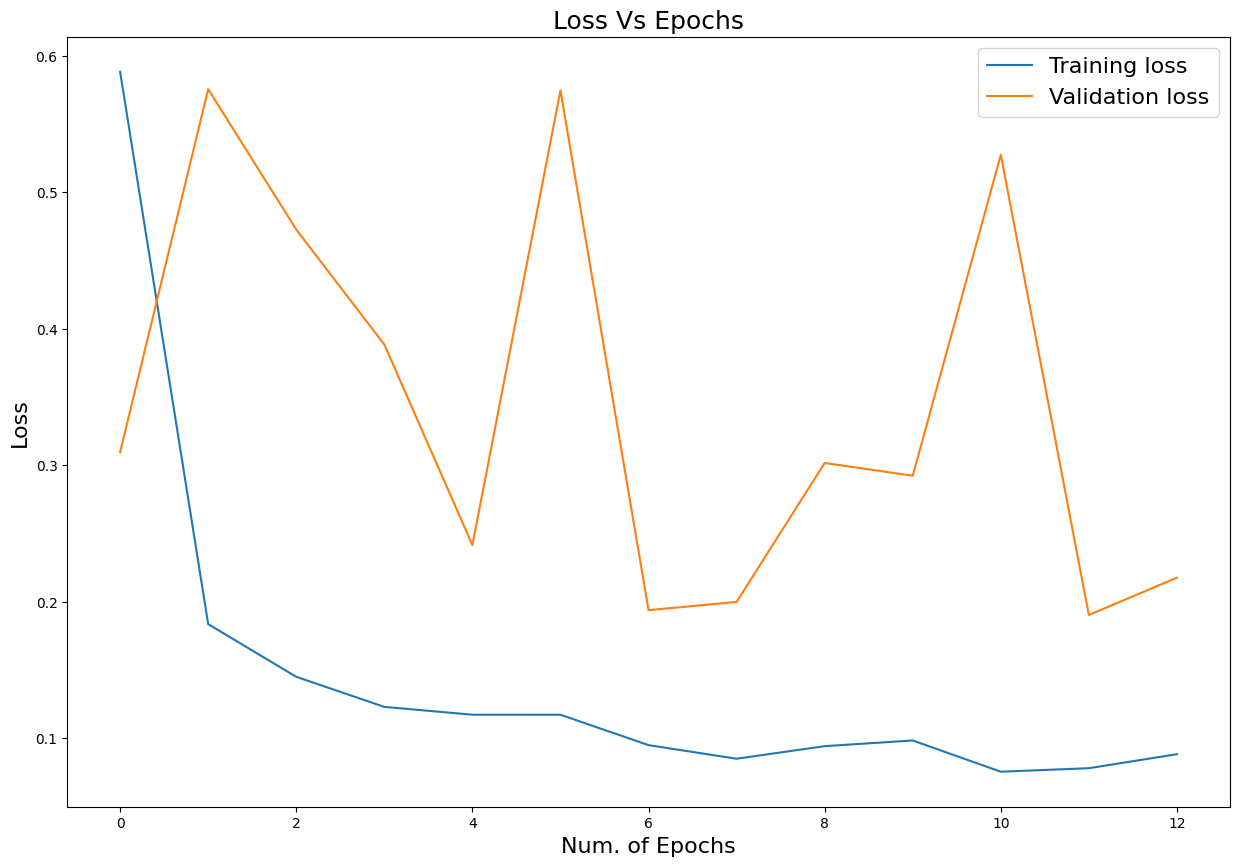

In [ ]:
# Plotting line plots showing Accuracy vs Loss Comparison for Train and Test Data

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(15, 10))
plt.plot(loss)
plt.plot(val_loss)

# Adding the title, legend and axis labels
plt.legend(['Training loss','Validation loss'], fontsize=16)
plt.title("Loss Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)

# Displaying the plot
plt.show()

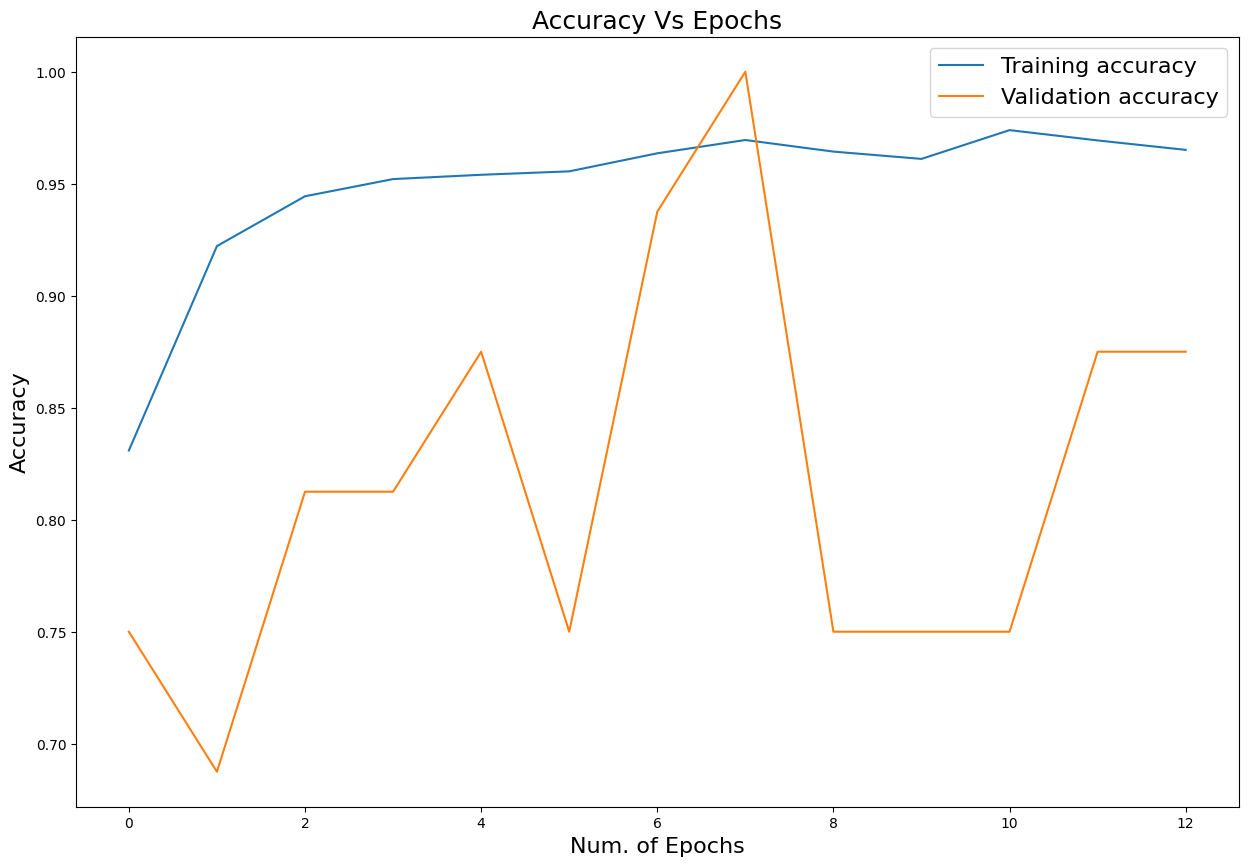

In [ ]:
# Plotting line plots showing Accuracy vs Epochs Comparison for Train and Test Data

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.figure(figsize=(15, 10))
plt.plot(accuracy)
plt.plot(val_accuracy)

# Adding the title, legend and axis labels
plt.legend(['Training accuracy','Validation accuracy'], fontsize=16)
plt.title("Accuracy Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)

# Displaying the plot
plt.show()

# **Comparing Performance With Other Models**

**Model 2 : Resnet**

In [ ]:
# ResNet50 Model Construction

from tensorflow.keras.applications.resnet50 import ResNet50

model_2 = Sequential()
model_2.add(ResNet50(weights='imagenet',include_top=False, input_shape=(300, 300, 3)))
model_2.add(Flatten())
model_2.add(Dropout(0.4))

# Adding Custom Dense Layers
model_2.add(Dense(128, activation="relu"))
model_2.add(Dense(64, activation="relu"))
model_2.add(Dense(16, activation="relu"))
model_2.add(Dense(1, activation="sigmoid"))

# Setting the last 7 layers of the architecture as frozen and not trainable
model_2.layers[-7].trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 10, 10, 2048)      23587712  
                                                                 
 flatten_3 (Flatten)         (None, 204800)            0         
                                                                 
 dropout_2 (Dropout)         (None, 204800)            0         
                                                                 
 dense_12 (Dense)            (None, 128)               26214528  
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 16)                1040      
                                                                 
 dense_15 (Dense)            (None, 1)                

In [ ]:
model_2.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
history2 = model_2.fit(train_generator, epochs = 13, validation_data = validation_generator)

Epoch 1/13
41/41 [==============================] - 202s 5s/step - loss: 3.4216 - accuracy: 0.6459 - val_loss: 1.9943 - val_accuracy: 0.5000
Epoch 2/13
41/41 [==============================] - 175s 4s/step - loss: 0.6239 - accuracy: 0.7571 - val_loss: 0.6447 - val_accuracy: 0.6250
Epoch 3/13
41/41 [==============================] - 173s 4s/step - loss: 0.3562 - accuracy: 0.8464 - val_loss: 1.1231 - val_accuracy: 0.5625
Epoch 4/13
41/41 [==============================] - 173s 4s/step - loss: 0.3670 - accuracy: 0.8380 - val_loss: 0.4904 - val_accuracy: 0.6875
Epoch 5/13
41/41 [==============================] - 174s 4s/step - loss: 0.3168 - accuracy: 0.8579 - val_loss: 0.6262 - val_accuracy: 0.6875
Epoch 6/13
41/41 [==============================] - 175s 4s/step - loss: 0.3036 - accuracy: 0.8648 - val_loss: 0.4505 - val_accuracy: 0.7500
Epoch 7/13
41/41 [==============================] - 175s 4s/step - loss: 0.3194 - accuracy: 0.8579 - val_loss: 0.4758 - val_accuracy: 0.8125
Epoch 8/13
41

In [ ]:
# Saving the trained model
model_2.save("Resnet50-7_trained.h5", overwrite=True)

In [ ]:
# Loading the saved model
model_2 = load_model("Resnet50-7_trained.h5")

In [ ]:
# Generating Test Results
test_result2 = model_2.evaluate_generator(test_generator, 624)

# Printing the loss and accuracy on test data
print('loss :', test_result2[0])
print('accuracy :', test_result2[1])
test_accuracy.append(test_result2[1])

<ipython-input-46-09c9fab0a221>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_result2 = model_2.evaluate_generator(test_generator, 624)


loss : 0.5856155753135681
accuracy : 0.7724359035491943


**Model 3 : InceptionV3**

In [ ]:
# InceptionV3 Model Construction

from keras.applications.inception_v3 import InceptionV3

model_3 = Sequential()
model_3.add(InceptionV3(weights='imagenet',include_top=False, input_shape=(300, 300, 3)))
model_3.add(Flatten())
model_3.add(Dropout(0.4))

# Adding Custom Dense Layers
model_3.add(Dense(128, activation="relu"))
model_3.add(Dense(64, activation="relu"))
model_3.add(Dense(16, activation="relu"))
model_3.add(Dense(1, activation="sigmoid"))

model_3.layers[-7].trainable = False



87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 flatten_4 (Flatten)         (None, 131072)            0         
                                                                 
 dropout_3 (Dropout)         (None, 131072)            0         
                                                                 
 dense_16 (Dense)            (None, 128)               16777344  
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 16)                1040      
                                                                 
 dense_19 (Dense)            (None, 1)                

In [ ]:
model_3.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
history3 = model_3.fit(train_generator, epochs = 13, validation_data = validation_generator)

Epoch 1/13
41/41 [==============================] - 189s 4s/step - loss: 1.3171 - accuracy: 0.8340 - val_loss: 0.2576 - val_accuracy: 0.8750
Epoch 2/13
41/41 [==============================] - 172s 4s/step - loss: 0.1249 - accuracy: 0.9496 - val_loss: 0.4352 - val_accuracy: 0.7500
Epoch 3/13
41/41 [==============================] - 172s 4s/step - loss: 0.1029 - accuracy: 0.9624 - val_loss: 0.6075 - val_accuracy: 0.8125
Epoch 4/13
41/41 [==============================] - 177s 4s/step - loss: 0.0980 - accuracy: 0.9632 - val_loss: 0.2434 - val_accuracy: 0.9375
Epoch 5/13
41/41 [==============================] - 178s 4s/step - loss: 0.0942 - accuracy: 0.9657 - val_loss: 0.3104 - val_accuracy: 0.8125
Epoch 6/13
41/41 [==============================] - 173s 4s/step - loss: 0.0727 - accuracy: 0.9714 - val_loss: 0.8673 - val_accuracy: 0.7500
Epoch 7/13
41/41 [==============================] - 174s 4s/step - loss: 0.0721 - accuracy: 0.9743 - val_loss: 0.1353 - val_accuracy: 0.9375
Epoch 8/13
41

In [ ]:
# Saving the trained model
model_3.save("InceptionV3-7_trained.h5", overwrite=True)

In [ ]:
# Loading the saved model
model_3 = load_model("InceptionV3-7_trained.h5")

In [ ]:
# Generating Test Results
test_result3 = model_3.evaluate_generator(test_generator, 624)

# Printing the loss and accuracy on test data
print('loss :', test_result3[0])
print('accuracy :', test_result3[1])
test_accuracy.append(test_result3[1])

<ipython-input-53-23097ad49935>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_result3 = model_3.evaluate_generator(test_generator, 624)


loss : 0.3464049696922302
accuracy : 0.8926281929016113


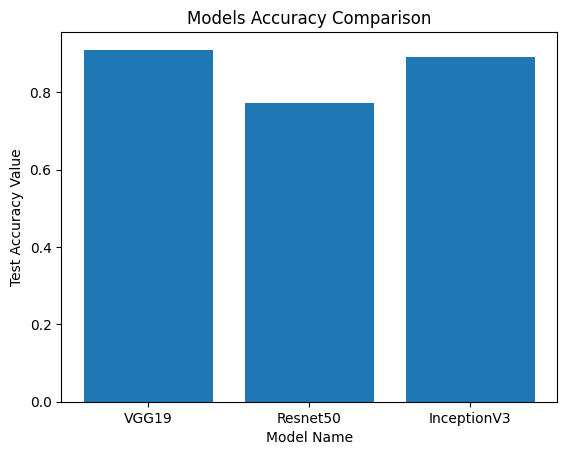

In [ ]:
# Plotting a bar chart showing Models Accuracy Comparison
plt.bar(models_used, test_accuracy)

# Adding the title and axis labels
plt.title("Models Accuracy Comparison")
plt.xlabel("Model Name")
plt.ylabel("Test Accuracy Value")

# Displaying the chart
plt.show()